In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression
from scipy.io import loadmat
from scipy.optimize import minimize

## Loading and Visualizing Data

Loading and Visualizing Data ...

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
Theta1 : (25, 401)
Theta2 : (10, 26)

Training images : (5000, 400)
Training labels : (5000, 1)
Training labels : 
 [[10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]]

Training Samples ... 



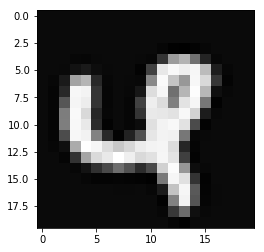

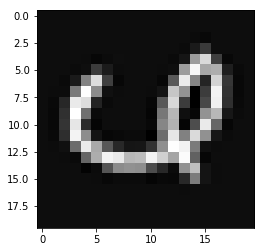

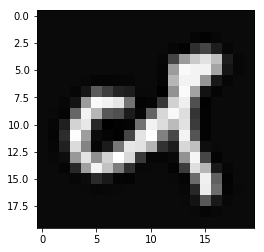

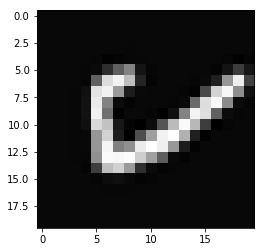

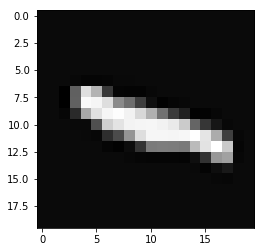

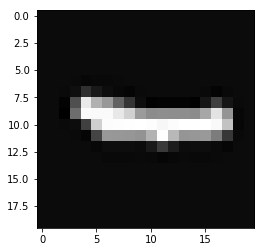

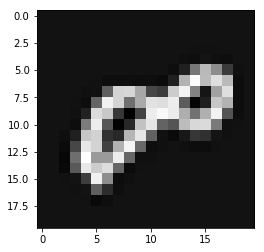

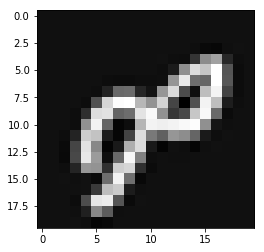

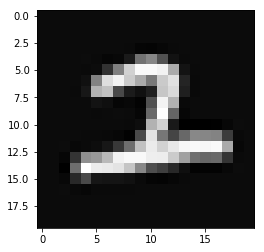

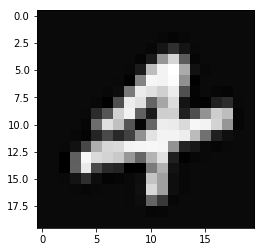

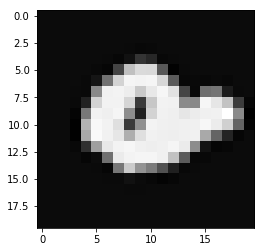

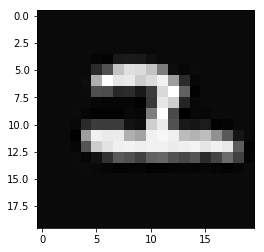

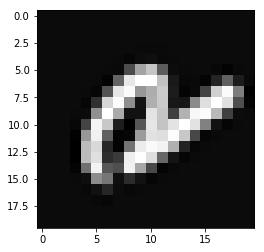

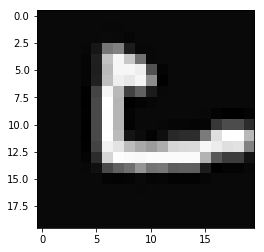

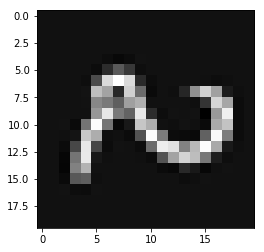

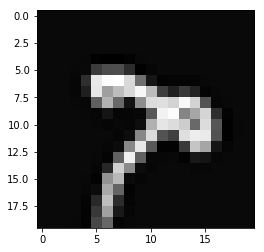

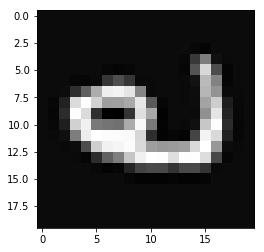

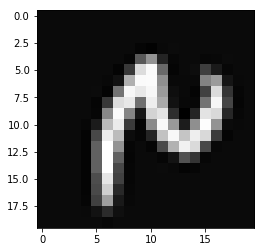

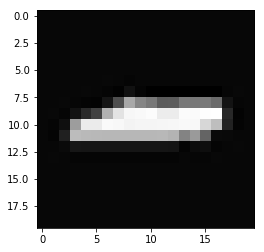

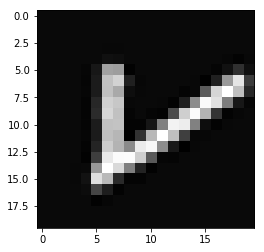

In [2]:
print("Loading and Visualizing Data ...\n")

data = loadmat('ex3data1.mat')
m = data['X'].shape

X = data['X']
y = data['y']

weights = loadmat('ex3weights.mat')

print(weights.keys())

Theta1, Theta2 = weights['Theta1'], weights['Theta2']

print(f'Theta1 : {Theta1.shape}')
print(f'Theta2 : {Theta2.shape}\n')

print(f'Training images : {X.shape}')
print(f'Training labels : {y.shape}')
print(f'Training labels : \n {y[:10,:]}\n')
print(f'Training Samples ... \n')

random_samples = np.random.choice(X.shape[0],20)

for i in random_samples:
    plt.imshow(X[i,:].reshape(20,20), cmap='gray')
    plt.show()

X = np.append(np.ones((X.shape[0],1)), X, axis=1)

## Vectorize Logistic Regression

In [3]:
def lrCostFunction(theta, X, y, lmbda):
    '''Compute cost for logistic regression with regularization'''
    m = len(y)
    
    h = 1/(1+np.exp(-(X.dot(theta))))
    
    J = (1/m) * ((- y.T.dot(np.log(h))) - ((1 - y).T.dot(np.log(1 - h)))) + (lmbda/(2 * m)) * (theta[1:].T.dot(theta[1:]))
    
    return J

In [4]:
def lrGradientDescent(theta, X, y, lmbda):
    '''Compute gradient descent for logistic regression with regularization'''
    m = len(y)
    
    h = 1/(1+np.exp(-(X.dot(theta)))).reshape(len(y),1)
    
    grad = np.zeros((X.shape[1],1))
    theta = theta.reshape(len(theta),1)

    grad[0] = ((1/m) * (X[:, 0].T.dot(h - y)))
    grad[1:] = (1/m) * (X[:, 1:].T.dot(h - y))
    grad[1:] += (lmbda/m) * theta[1:,:]
    
    return grad.flatten()

## One vs all

### Training

In [5]:
def onevsall(X, y, num_labels, lmbda):
    all_thetas = np.zeros((num_labels, len(X[0])))
    theta = np.zeros((len(X[0]),1))
    
    for i in range(1, num_labels+1):
        
        optimizer = minimize(fun=lrCostFunction,x0=theta, args=(X, ((y == i) * 1), lmbda), method='L-BFGS-B', jac=lrGradientDescent, options={'maxiter': 50})
        print(f'Iterations 50 : cost {optimizer.fun}')
        all_thetas[i - 1] = optimizer.x
    
    return all_thetas

In [6]:
lmbda = 0.1

all_thetas = onevsall(X, y, 10, lmbda)

Iterations 50 : cost [0.01315114]
Iterations 50 : cost [0.05249678]
Iterations 50 : cost [0.05886792]
Iterations 50 : cost [0.03360503]
Iterations 50 : cost [0.05591333]
Iterations 50 : cost [0.01848127]
Iterations 50 : cost [0.03113058]
Iterations 50 : cost [0.08005104]
Iterations 50 : cost [0.07235958]
Iterations 50 : cost [0.00860327]


### Prediction

In [7]:
def onevsallPredict(theta, X):
    
    m = len(y)
    
    p = 1/(1+np.exp(-(X.dot(theta.T))))
    
    ret = np.argmax(p, axis=1) + 1
    
    return ret.reshape(len(ret),1)

In [8]:
p = onevsallPredict(all_thetas, X)
print(f'Training set accuracy : {np.mean(p == y) * 100} %')


Training set accuracy : 96.2 %


## One vs all sklearn

In [9]:
clf = LogisticRegression(solver='newton-cg',multi_class='multinomial', n_jobs=-1, verbose=1)

clf.fit(X,y.reshape(len(y)))

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=1, warm_start=False)

In [34]:
p = clf.predict(X)
print(f'Training set accuracy : {np.mean(p == y.reshape(len(y))) * 100} %')


Training set accuracy : 96.24000000000001 %


## Neural Networks

In [40]:
def predict(Theta1, Theta2, X):
    
    m = len(X)
    num_labels = Theta2.shape[0]
    
    second_layer = X.dot(Theta1.T)
    second_layer = 1 / (1 + np.exp(-second_layer))
    
    second_layer = np.append(np.ones((second_layer.shape[0],1)), second_layer, axis=1)
    third_layer = Theta2.dot(second_layer.T)
    third_layer = 1/ (1+np.exp(- third_layer))
    
    p = np.argmax(third_layer.T, axis=1)
    
    return p + 1

In [42]:
p = predict(Theta1, Theta2, X)
print(f'Training set accuracy : {np.mean(p == y.reshape(len(y))) * 100} %')

Training set accuracy : 97.52 %
